# Heart Disease Prediction

In [1]:
#importing the dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#data collection and processing
heart_data = pd.read_csv("heart.csv")

In [3]:
heart_data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [4]:
heart_data.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0

In [51]:
heart_data['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [5]:
 #number of rows and coloumns in a dataset
heart_data.shape

(1025, 14)

In [6]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
#checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#statistical measure about the data
heart_data.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [9]:
#checking the distribution of target variable
heart_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

1---> defective heart
0--> Healthy heart

In [10]:
#spliting the feautures and targets
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [11]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [12]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


Splitting the data into Training and Testing data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


In [15]:
print(Y_train)

14      0
586     0
16      1
462     1
186     0
       ..
221     0
906     1
1002    0
966     0
191     1
Name: target, Length: 820, dtype: int64


Model Training 

In [16]:
print(Y_train.shape)

(820,)


In [17]:
#Logistic Regression Model
model=LogisticRegression()

In [18]:
#training the logistic regression model with training data
model.fit(X_train, Y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

KNN classifier()

Logistic Regression()

Decision Tree()

In [19]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier

In [20]:
KNN =  KNeighborsClassifier(n_neighbors=5,
    weights='uniform',
    algorithm='kd_tree',
    leaf_size=30,
    p=2,
    metric='minkowski',
    n_jobs=-1)

In [21]:
KNN.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1)

In [22]:
Y_pred= KNN.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [63]:
accuracy_score(Y_test, Y_pred)

0.7219512195121951

In [24]:
print('classification',classification_report(Y_test, Y_pred))

classification               precision    recall  f1-score   support

           0       0.70      0.74      0.72       100
           1       0.74      0.70      0.72       105

    accuracy                           0.72       205
   macro avg       0.72      0.72      0.72       205
weighted avg       0.72      0.72      0.72       205



In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [26]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

In [27]:
classifier=DecisionTreeClassifier(random_state=1)

In [28]:
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

In [67]:
score=classifier.score(X_test, Y_test)

In [68]:
print(score)

1.0


LOgistic Regression

In [31]:
#accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [32]:
print("Accuracy on traing data:", training_data_accuracy)

Accuracy on traing data: 0.848780487804878


In [33]:
#accuracy score on testing data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [34]:
print("Accuracy on test data:", testing_data_accuracy)

Accuracy on test data: 0.8048780487804879


In [64]:
print('LR:',accuracy_score(X_test_prediction, Y_test))
print('KNN:',accuracy_score(Y_test, Y_pred))
print('DT:',classifier.score(X_test, Y_test))

LR: 0.8048780487804879
KNN: 0.7219512195121951
DT: 1.0


Building the Predictive System

In [35]:
input_data = (61,1,0,148,203,0,1,161,0,0,2,1,3)

#change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

#reshape the numpy array to show that we are prediction for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
    print("the person does not have a heart disease!")
else:
    print("The person has heart disease!")

[0]
the person does not have a heart disease!


# Exploratory Analysis

In [37]:
import matplotlib.pyplot as plt
import scipy
import scipy.ndimage
import os
import sys
from matplotlib.patches import Ellipse
import seaborn as sns




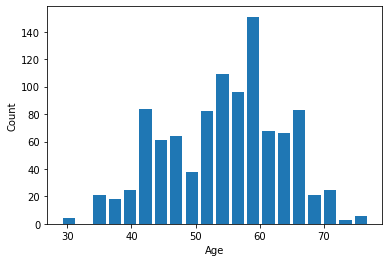

In [38]:
# 1)Histogram
plt.hist(heart_data["age"],bins=20, rwidth=0.8)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

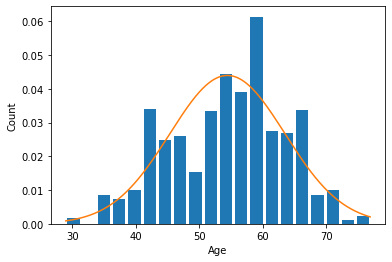

In [39]:
from scipy.stats import norm
import numpy as np
plt.hist(heart_data["age"],bins=20, rwidth=0.8, density=True)
plt.xlabel('Age')
plt.ylabel('Count')



rng = np.arange(heart_data["age"].min(), heart_data["age"].max(), 0.1)
plt.plot(rng, norm.pdf(rng,heart_data["age"].mean(),heart_data["age"].std()))


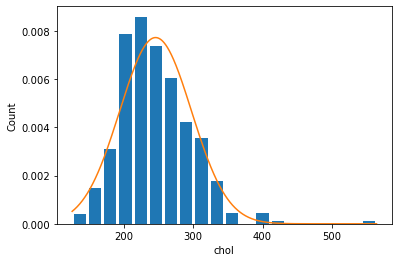

In [40]:
plt.hist(heart_data["chol"],bins=20, rwidth=0.8, density=True)
plt.xlabel('chol')
plt.ylabel('Count')



rng = np.arange(heart_data["chol"].min(), heart_data["chol"].max(), 0.1)
plt.plot(rng, norm.pdf(rng,heart_data["chol"].mean(),heart_data["chol"].std()))

<AxesSubplot:>

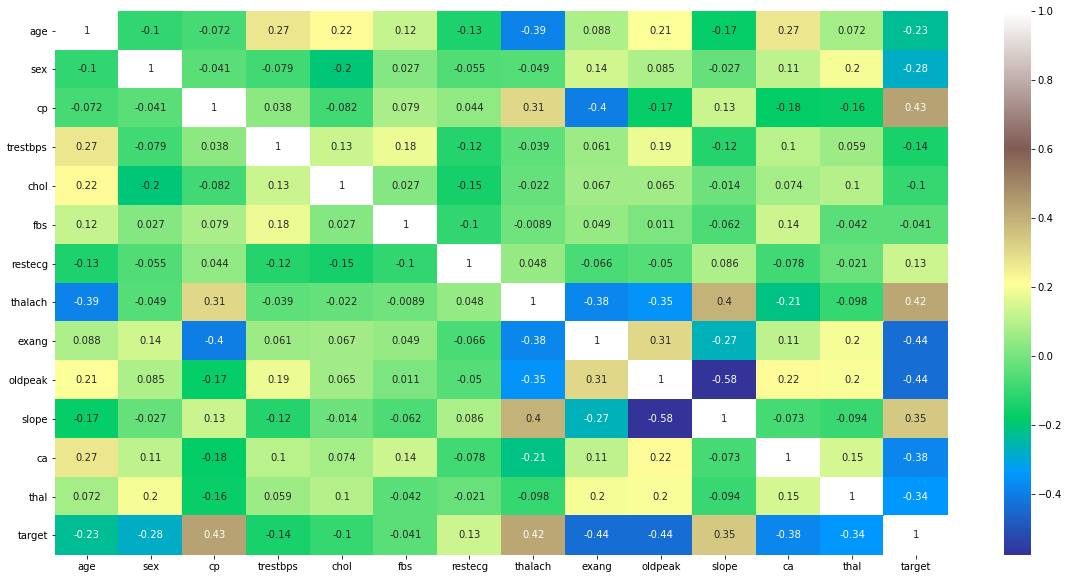

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(heart_data.corr(), annot=True, cmap='terrain')

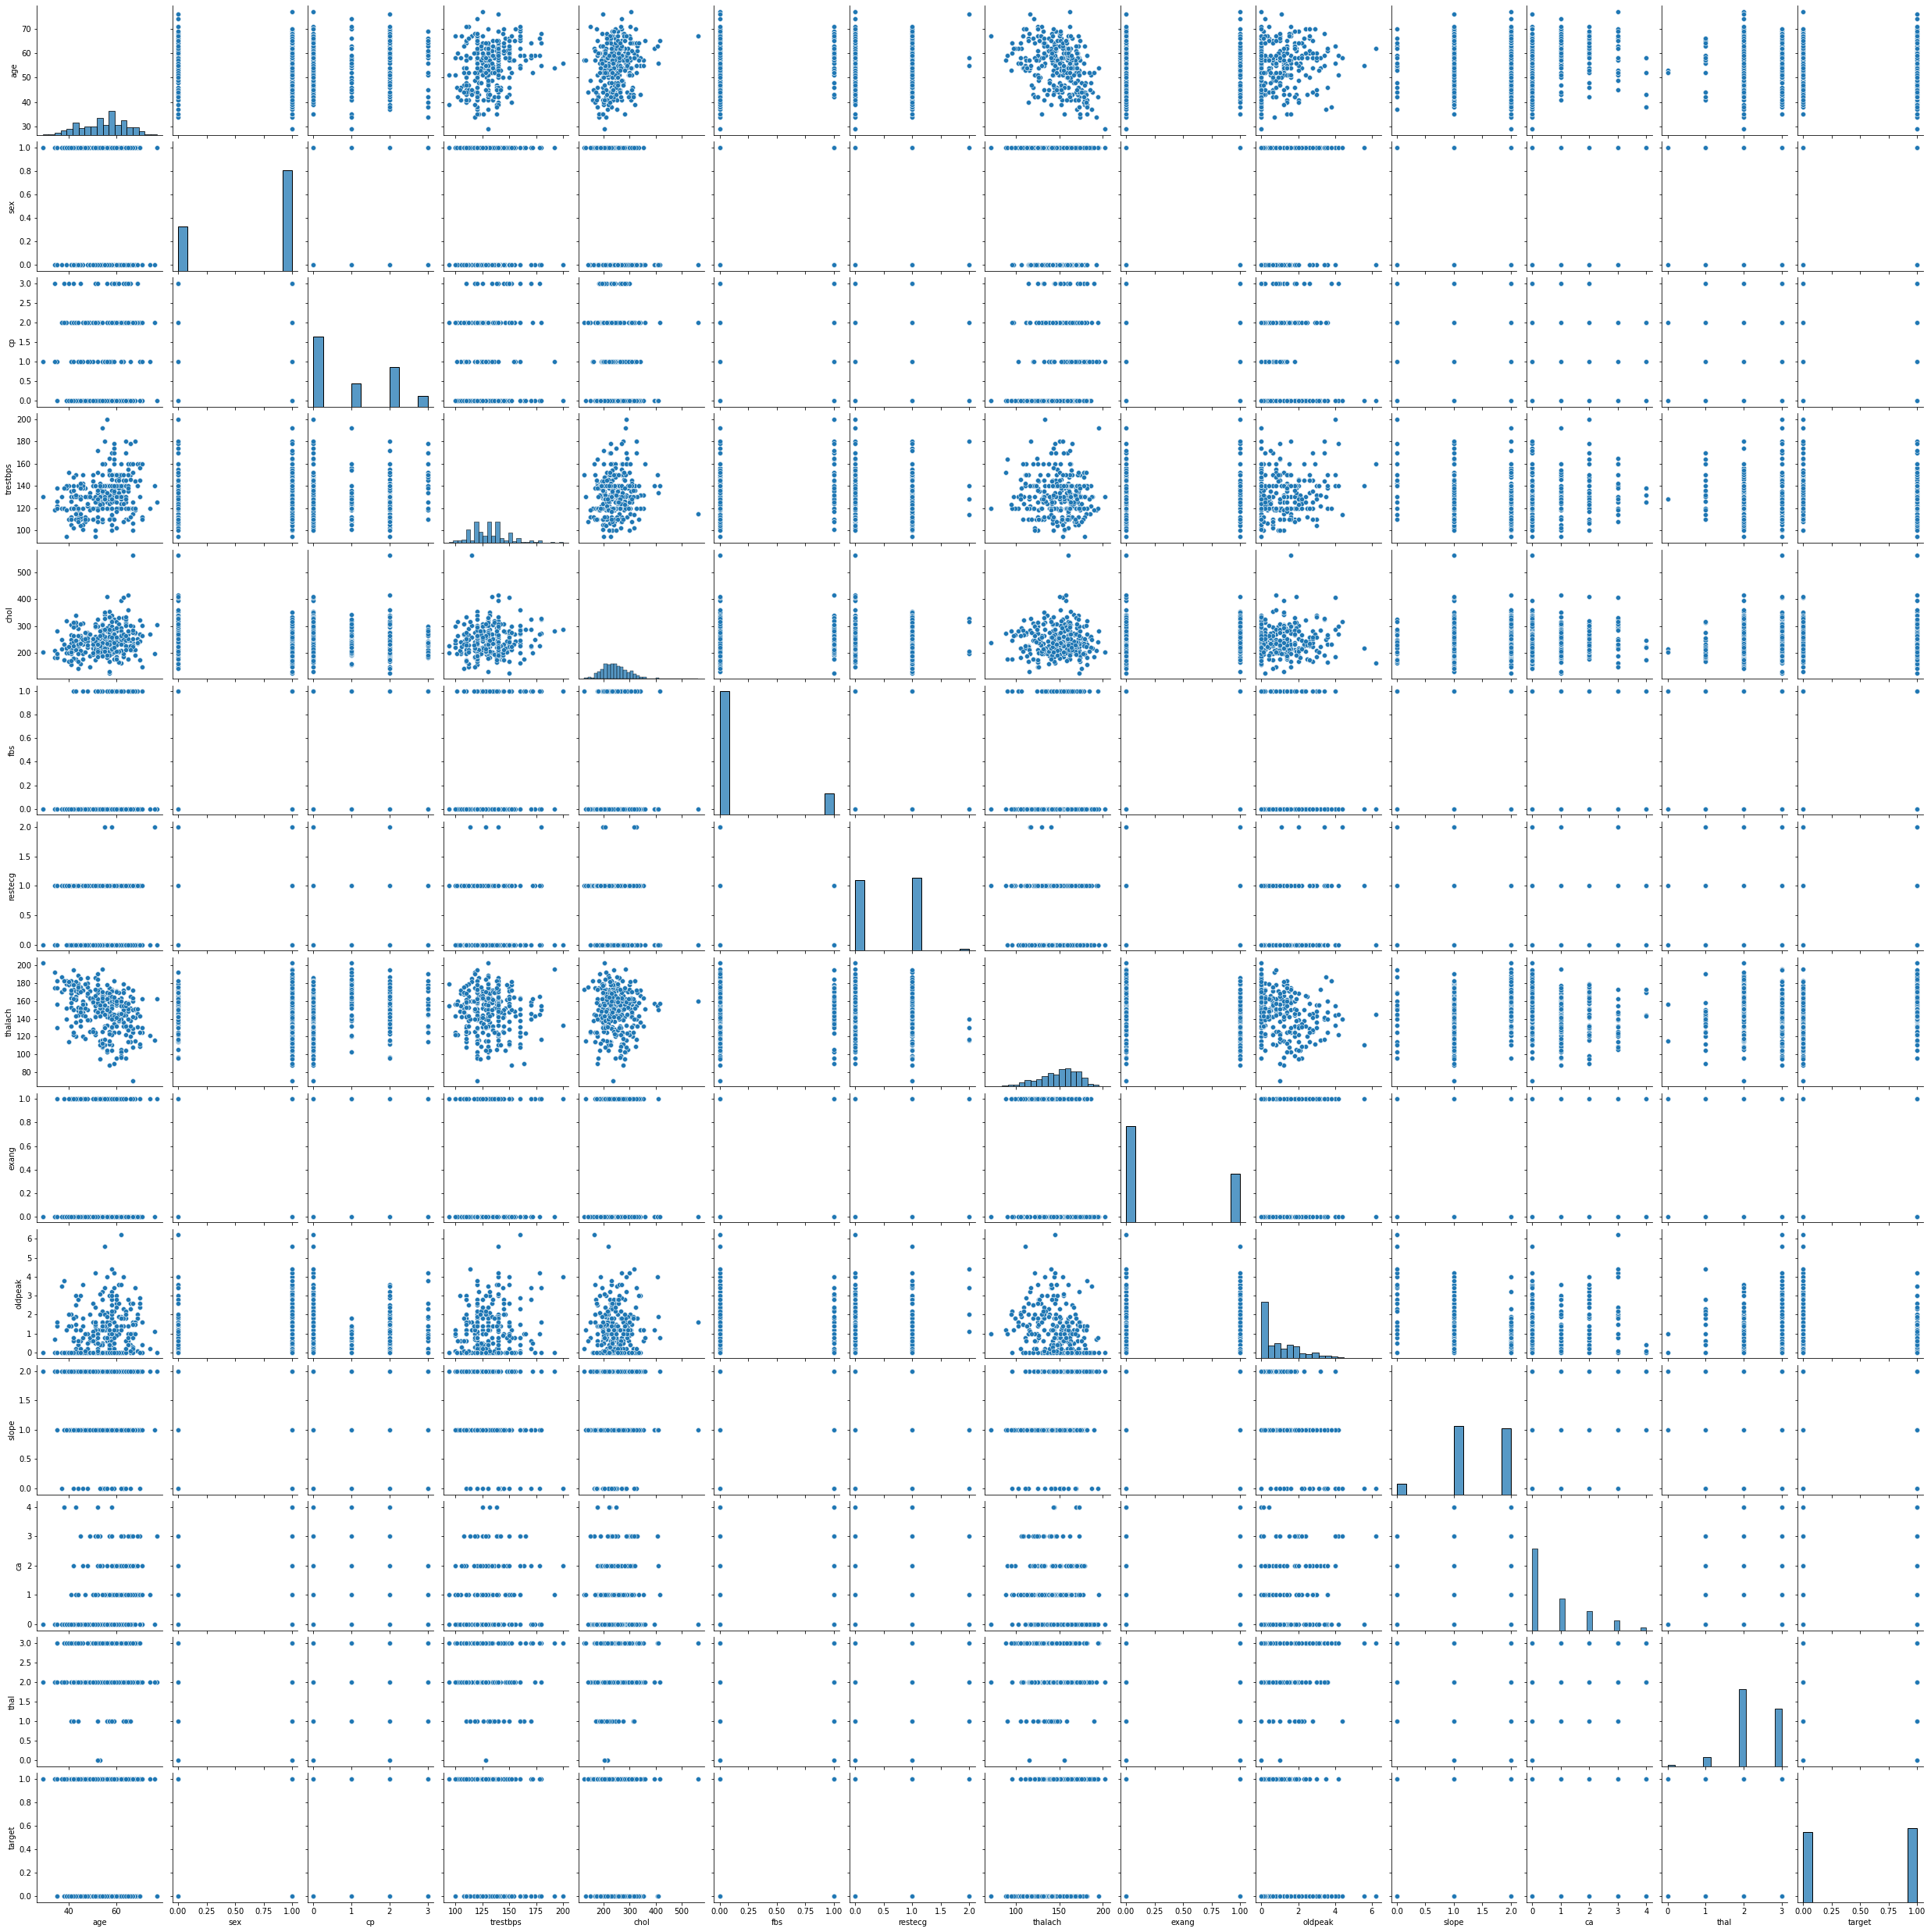

In [42]:
sns.pairplot(data=heart_data)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>],
       [<AxesSubplot:title={'center':'trestbps'}>,
        <AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>],
       [<AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>,
        <AxesSubplot:title={'center':'exang'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>]],
      dtype=object)

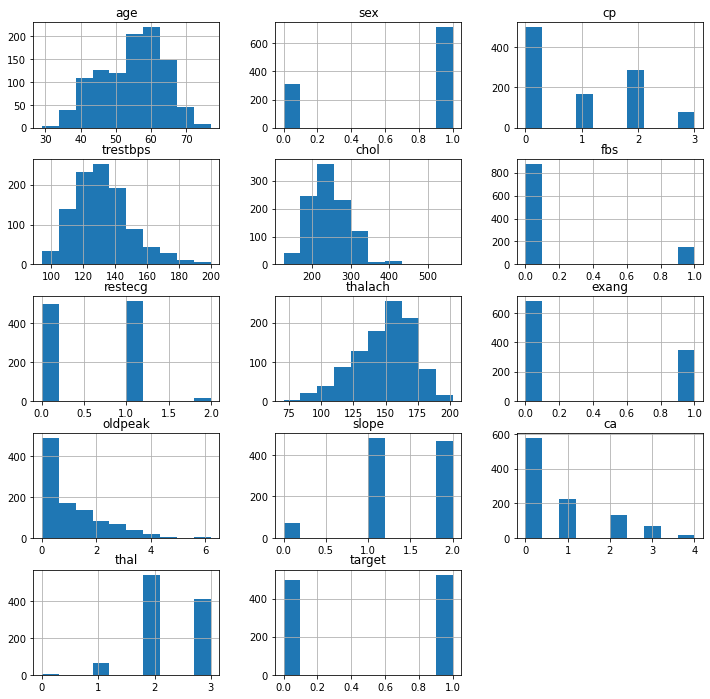

In [43]:
heart_data.hist(figsize=(12,12), layout=(5,3))

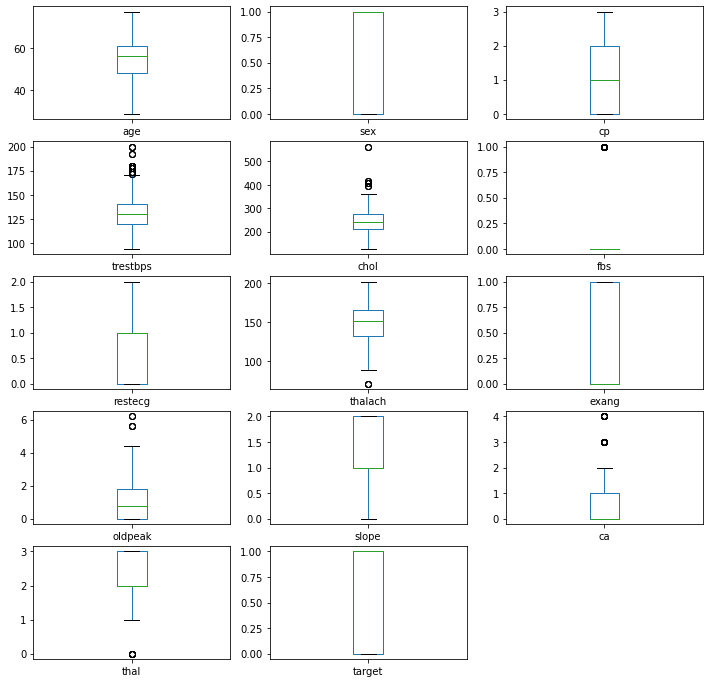

In [48]:
#box and whister plot
heart_data.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
plt.show()

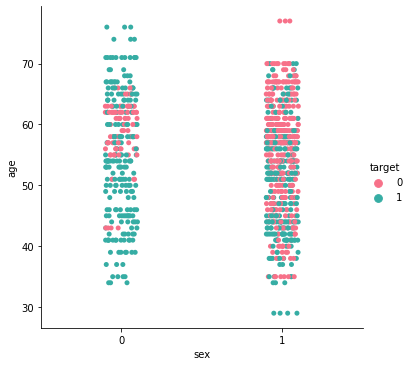

In [49]:
sns.catplot(data=heart_data,x='sex',y='age', hue='target',palette='husl')

<AxesSubplot:xlabel='sex', ylabel='chol'>

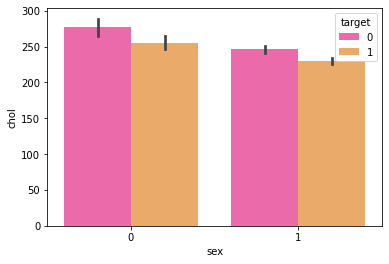

In [50]:
sns.barplot(data=heart_data,x='sex',y='chol',hue='target',palette='spring')

In [52]:
heart_data['cp'].value_counts() #chest pain type

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

<AxesSubplot:xlabel='cp', ylabel='count'>

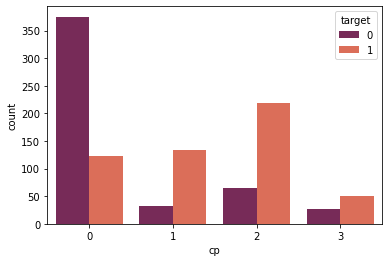

In [53]:
sns.countplot(x='cp', hue='target',data=heart_data, palette='rocket')

In [54]:
#cross table
gen=pd.crosstab(heart_data['sex'],heart_data['target'])
print(gen)

target    0    1
sex             
0        86  226
1       413  300


<AxesSubplot:xlabel='sex'>

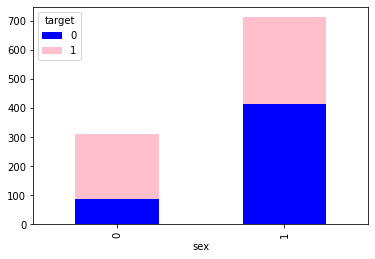

In [58]:
gen.plot(kind='bar', stacked=True, color=['blue','pink'], grid=False)

In [60]:
chest_pain=pd.crosstab(heart_data['cp'],heart_data['target'])
chest_pain

target    0    1
cp              
0       375  122
1        33  134
2        65  219
3        26   51

<AxesSubplot:xlabel='cp'>

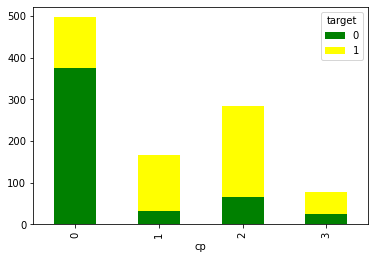

In [61]:
chest_pain.plot(kind='bar', stacked=True, color=['green','yellow'], grid=False)